# Ford Go bike Dataset Exploration
## by Steven John

## Preliminary Wrangling
* Ford Go bike services provides rental services for bikes
* This dataset includes trips taken by users in month of February 2019 covering the greater San Francisco Bay.
* The Dataset contains information about the trips taken by the users which are their:
<ol> <b>
<li>duration_sec</li> 
<li>start_time</li>
<li>end_time</li>
<li>start_station_id</li> 
<li>start_station_name</li> 
<li>start_station_latitude</li> 
<li>start_station_longitude</li> 
<li>end_station_id</li>
<li>end_station_name</li>
<li>end_station_latitude</li>
<li>end_station_longitude</li> 
<li>bike_id</li> 
<li>user_type</li> 
<li>member_birth_year</li> 
<li>member_gender</li> 
<li>bike_share_for_all_trip</li>
    </b>
</ol>
* Dataset Link: https://www.kaggle.com/chirag02/ford-gobike-2019feb-tripdata

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#lets's start by Loading the Dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')

let's invistigate the dataset and structuer to find points of interest

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.shape

(183412, 16)

After the data inspection and viewing its structure, I will start cleaning the data by droping any unwanted columns, droping any dublicates then fixing datatypes if needed and droping the missing values or substituting them accordingly

In [8]:
# Drop uneeded columns
df.drop(['start_station_latitude','start_station_longitude','end_station_latitude', 'end_station_longitude','start_station_id'
        ,'end_station_id','bike_share_for_all_trip'], axis=1 ,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   duration_sec        183412 non-null  int64  
 1   start_time          183412 non-null  object 
 2   end_time            183412 non-null  object 
 3   start_station_name  183215 non-null  object 
 4   end_station_name    183215 non-null  object 
 5   bike_id             183412 non-null  int64  
 6   user_type           183412 non-null  object 
 7   member_birth_year   175147 non-null  float64
 8   member_gender       175147 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 12.6+ MB


In [9]:
#check if there are duplicates
df.duplicated().sum()


0

In [10]:
# check for missing values
df.isnull().sum()

duration_sec             0
start_time               0
end_time                 0
start_station_name     197
end_station_name       197
bike_id                  0
user_type                0
member_birth_year     8265
member_gender         8265
dtype: int64

In [11]:
# Now lets drop the null values of start_station_name, end_station_name, member_birth_year, member_gender since 
# the portion of the null values are about only 4.6% of the dataset which small
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   duration_sec        174952 non-null  int64  
 1   start_time          174952 non-null  object 
 2   end_time            174952 non-null  object 
 3   start_station_name  174952 non-null  object 
 4   end_station_name    174952 non-null  object 
 5   bike_id             174952 non-null  int64  
 6   user_type           174952 non-null  object 
 7   member_birth_year   174952 non-null  float64
 8   member_gender       174952 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 13.3+ MB


In [12]:
df.shape

(174952, 9)

In [13]:
df.isnull().sum()

duration_sec          0
start_time            0
end_time              0
start_station_name    0
end_station_name      0
bike_id               0
user_type             0
member_birth_year     0
member_gender         0
dtype: int64

In [14]:
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male


In [15]:
#Now I will fix the datatypes accordingly
#fix data types by changing start_time and end_time to date format
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])
#change member_birth_year to int format
df['member_birth_year']=df.member_birth_year.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        174952 non-null  int64         
 1   start_time          174952 non-null  datetime64[ns]
 2   end_time            174952 non-null  datetime64[ns]
 3   start_station_name  174952 non-null  object        
 4   end_station_name    174952 non-null  object        
 5   bike_id             174952 non-null  int64         
 6   user_type           174952 non-null  object        
 7   member_birth_year   174952 non-null  int32         
 8   member_gender       174952 non-null  object        
dtypes: datetime64[ns](2), int32(1), int64(2), object(4)
memory usage: 12.7+ MB


Now lets add a few columns to help us visulaize our dataset better such as a column for the rent day name, is a weekenk or not, hours, mins duration and we already have the duration in secs, also the start and end hours, finally the age of the biker

In [16]:
# Creating new column for the day name
df['day_name'] = df['start_time'].dt.day_name()
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,day_name
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,Thursday


In [17]:
# Creating new column for the duration in mins name
# in the duration_min I round up thus even 1 min and 1 secs taken will be considerd a 2 min rent
df['duration_min'] = round((df['duration_sec']/60),2)
# here I round so if rent duration took about 2 hours and 20 min then I round to 2 hours but if took around 2 hours and 50 min
# then I we round to 3 hours 
df['duration_hour'] = round(df['duration_min']/60)

In [18]:
# Creating new column for the Age of the biker
df['age'] = 2021 - df['member_birth_year']
# Creating new column for is it aweekend day or not
def add_isweekend(df_column):
    df['isWeekend'] = df_column.apply(lambda x:'Week_End' if x=="Saturday" or x=="Sunday" else 'Week_Day')
    pass


add_isweekend(df['day_name'])
# I will also Add the hour the rental starts at and the hour it ends at
df['Start_hour'] = pd.DatetimeIndex(df['start_time']).hour
df['end_hour'] = pd.DatetimeIndex(df['end_time']).hour

df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,day_name,duration_min,duration_hour,age,isWeekend,Start_hour,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,Thursday,869.75,14.0,37,Week_Day,17,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,Thursday,1030.90,17.0,49,Week_Day,12,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,Thursday,608.17,10.0,32,Week_Day,17,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Thursday,26.42,0.0,47,Week_Day,23,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,Thursday,29.88,0.0,62,Week_Day,23,0


In [19]:
df.shape

(174952, 16)

### What is the structure of your dataset?

> The original dataset contained 183412 rows and 16 columns where it contained the general bike rental information such as the start, end stations name and location in latitude, duration taken for each ride in seconds, the start and end dates for each ride, the bike unique id, the biker birth year, gender and if the biker is a customer or a subscriber inside the user_type column.
> After goining through the data Wrangling process we now have the modified dataset that contains 174952 rows and 16 columns with some unwanted columns removed and I added some new feauters such as the duration taken in hours, mins and the day name and hour at which the bike was rented at and the user age 

### What is/are the main feature(s) of interest in your dataset?

* The time and day at which the rentals are highest or lowest!
* The staions with highest or lowest rentals!
* The average age of the bikers, thier type and gender and who uses the service the most?
* Are the bikes rented more on weekends than on weekdays?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The most helpful featuers will propably be the duration in mins and hours, the day_name of the week, wheather its a weekend or not, the staions name and the user type, gender and age 

## Univariate Exploration

#### 1. Which type of user uses the rental service more ?

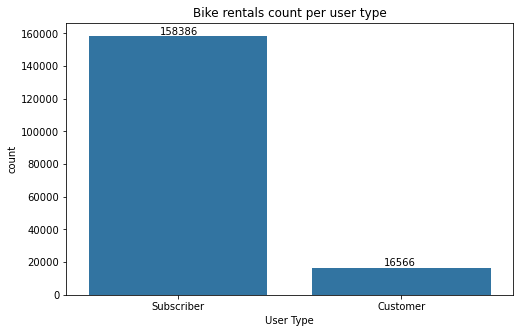

In [20]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(8,5))
ax = sb.countplot(data = df, x = 'user_type',order=df['user_type'].value_counts().index, color=base_color)
plt.title("Bike rentals count per user type");
plt.xlabel("User Type");
for i in range (df['user_type'].value_counts().shape[0]):
    count = df['user_type'].value_counts()[i]
    pct_string = '{}'.format(count)
    plt.text(i-0.08, count+2800, pct_string, va='center')

#### In this bar chart we have observed that the bikers who are subscribers tend to use the rental services much more than those who are customers and I plan to investigate this further by adding the day, start_hour and is weekend or not to the comparison to be able to obtain a more detailed comparison later

#### 2. At which hours do we see the most rentals ?

In [21]:
df['Start_hour'].unique()

array([17, 12, 23, 22, 21, 18, 20, 19, 10, 15, 16,  9, 11,  0, 13, 14,  8,
        7,  5,  6,  4,  3,  2,  1], dtype=int64)

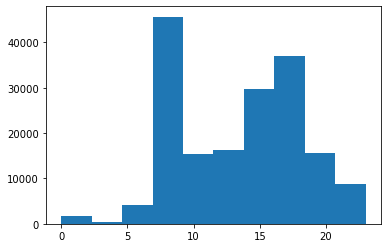

In [22]:
plt.hist(df['Start_hour']);

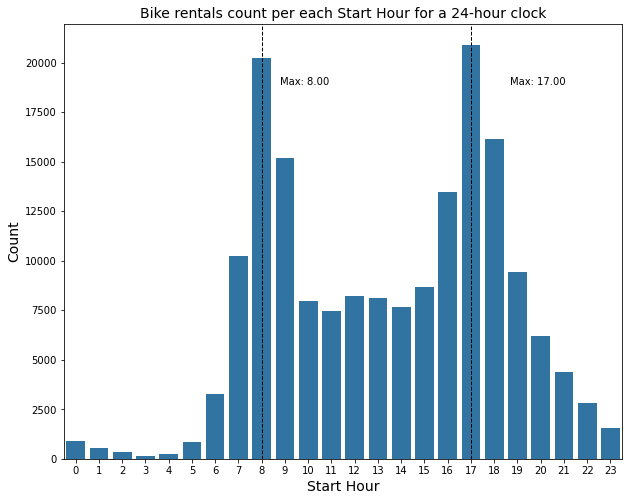

In [23]:


plt.figure(figsize=(10,8));
sb.countplot(data = df, x = 'Start_hour',color=base_color)
plt.title("Bike rentals count per each Start Hour for a 24-hour clock",fontsize=14);
plt.ylabel("Count",fontsize=14)
plt.xlabel("Start Hour",fontsize=14);
x_pos1=df['Start_hour'].value_counts().index[0]
plt.axvline(x_pos1, color='k', linestyle='dashed', linewidth=1);
plt.text(x_pos1*1.1, 21000*0.9, 'Max: {:.2f}'.format(x_pos1.max()));
x_pos2=df['Start_hour'].value_counts().index[1]
plt.axvline(x_pos2, color='k', linestyle='dashed', linewidth=1);
plt.text(x_pos2*1.1, 21000*0.9, 'Max: {:.2f}'.format(x_pos2.max()));

#### In this chart we have observed that the most bike rentals are the highest at 8 am and 5 pm which correspond to normal office hours duration which should be between 8 am to 5 pm.

#### 3. which day has the highest bike rentals

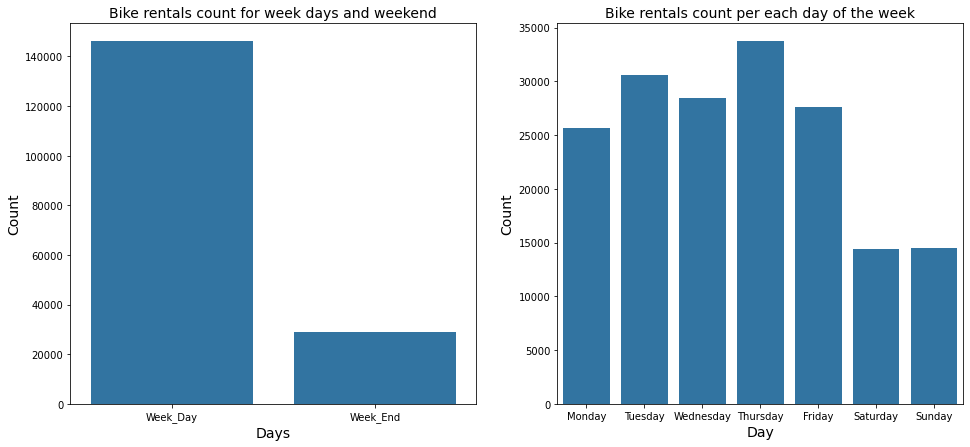

In [24]:
order_index= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(16,7));
plt.subplot(1, 2, 1)
sb.countplot(data = df, x = "isWeekend",color=base_color)
plt.title("Bike rentals count for week days and weekend",fontsize=14);
plt.ylabel("Count",fontsize=14)
plt.xlabel("Days",fontsize=14);

plt.subplot(1, 2, 2)

sb.countplot(data = df, x = "day_name",color=base_color, order=order_index)
plt.title("Bike rentals count per each day of the week",fontsize=14);
plt.ylabel("Count",fontsize=14)
plt.xlabel("Day",fontsize=14);

#### As expected we observed that the highest rentals is in the week Days which supports our previous insghit where we stated that the most rentals corresponds to normal office hours 

#### 4. What is the most common Duration for riders?

In [25]:
df['duration_hour'].describe()

count    174952.000000
mean          0.051208
std           0.474464
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: duration_hour, dtype: float64

In [26]:
df['duration_min'].describe()

count    174952.000000
mean         11.733373
std          27.370085
min           1.020000
25%           5.380000
50%           8.500000
75%          13.150000
max        1409.130000
Name: duration_min, dtype: float64

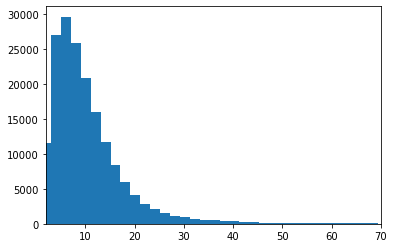

In [27]:
plt.hist(df['duration_min'],bins=700);
# lets zoom in for better observation
plt.xlim(2,70);

#### We can observe that the most common apperas to satring from 10 mins and less, but this statment isn't accurate as the histogram is skewed to the right and also we can consider values form above 60 to be outliers, therfore we should remove the outliers first

In [28]:
# Now we will remove the outliers in duration_min
df = df[(df['duration_min'] <= 60)]

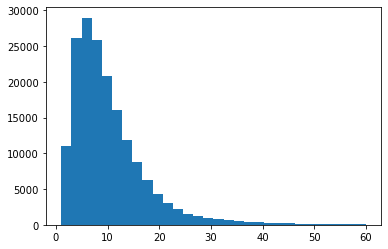

In [29]:
plt.hist(df['duration_min'],bins=30);

#### We Can still observe that it is right skewed so we should apply the log scale on it for better representation

In [30]:
np.log10(df['duration_min'].describe())

count    5.239465
mean     1.013189
std      0.869011
min      0.008600
25%      0.728354
50%      0.926857
75%      1.113943
max      1.777644
Name: duration_min, dtype: float64

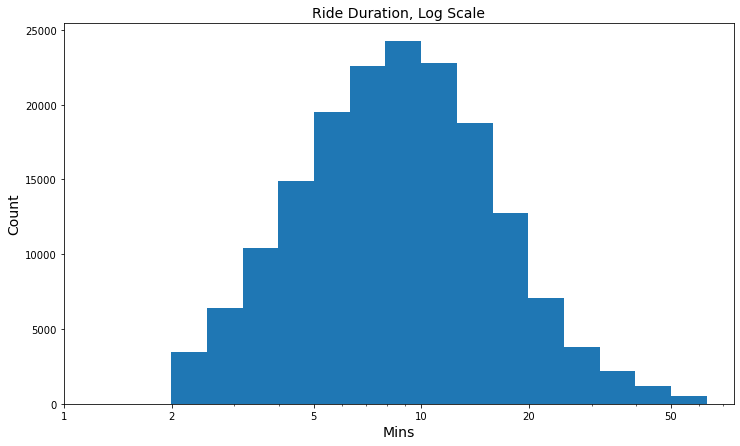

In [31]:
bin_edges = 10 ** np.arange(0.3, 1.778+0.1, 0.1)
plt.figure(figsize=(12,7));
plt.hist(df['duration_min'], bins = bin_edges)
plt.xscale('log')
ticks = [1,2,5,10,20,50]
plt.xticks(ticks, ticks)
plt.title("Ride Duration, Log Scale",fontsize=14);
plt.ylabel("Count",fontsize=14)
plt.xlabel("Mins",fontsize=14);

#### Now with a more clear observation can say that the most comman duration is between 8 min and 10 mins

#### 5. What are the top 5 Start Staions with the highest traffic?

In [32]:
# this will be a user defiend function that I will propably use again later
# this function will return the top start or end stations with the highest or lowest traffic based on user input
def top_companies(name,n,reverse =False):
    top_five_values=[]; top_five_names=[]
    for i in range(n):
        if reverse:
            i=(df[name].value_counts().shape[0] -1) -i
                
        top_five_names.append(df[name].value_counts().index[i])
        top_five_values.append(df[name].value_counts()[i])

    return top_five_names, top_five_values
 
names ,values = top_companies('start_station_name',5)
names,values

(['Market St at 10th St',
  'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
  'Berry St at 4th St',
  'Montgomery St BART Station (Market St at 2nd St)',
  'Powell St BART Station (Market St at 4th St)'],
 [3634, 3401, 2935, 2696, 2580])

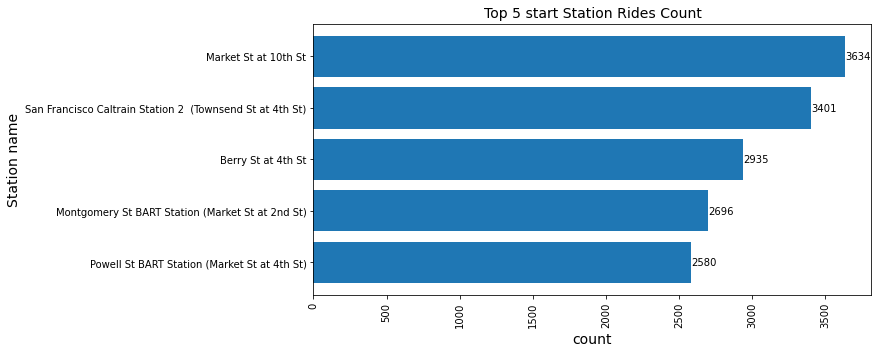

In [33]:
plt.figure(figsize=(10,5));
plt.barh(y=names[::-1],width=values[::-1])


for i in range (len(names)):
    count = values[len(values)-1 -i]
    pct_string = '{}'.format(count)
    plt.text(count+1, i, pct_string, va='center')
 

plt.xticks(rotation=90) ;
plt.title('Top 5 start Station Rides Count',fontsize=14);
plt.xlabel('count',fontsize=14);
plt.ylabel('Station name',fontsize=14);

#### Here We can clearly observe the top five busiest Start Stations in a descending order

In [34]:
df.age.describe()

count    173566.000000
mean         36.191610
std          10.116912
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: age, dtype: float64

In [35]:
# Now we will remove the outliers in age which will help us in our next invistigation with Bivariate and Multivariate
df = df[(df['age'] <= 80)]

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* The bikers who are subscribers tend to rent more than the customer bikers, also bikers in general tend to rent more bikes on week days than weeks ends which is also supported by having the highest rentals per on 8 am and 5 pm. which corrsponds to normal working hours. also the bikers ride duration in general is less than 60 mins and with the highest amount of rides between 8 to 10 mins. we also looked at the top five busiest Stations
* some unusal points were the outliers in duration per minutes and age columns. Thus, I removed the outliers for better representation
* we used logarithmic scale on the histogram of the rides per duration in mins because most data was right skewed. There we no other trasnformation needed as the variables are categorical vs quantitive and they are clear.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were some unusual distribution in the duration per min column as it contained outliers for example the maximum value was 1409 and most of the data were less than 60 minutes. Thus is removed those outliers for better representation, we also had a simillar problem with age as the maximum 143 which is not possiable and also most of the users were below 70 thus I removed all the age outliers where a person is greater than 80

## Bivariate Exploration

In [36]:
df.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,day_name,duration_min,duration_hour,age,isWeekend,Start_hour,end_hour
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Thursday,26.42,0.0,47,Week_Day,23,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,Thursday,29.88,0.0,62,Week_Day,23,0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,San Jose Diridon Station,3803,Subscriber,1983,Female,Thursday,19.12,0.0,38,Week_Day,23,0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,Washington St at Kearny St,Valencia St at 21st St,6329,Subscriber,1989,Male,Thursday,26.92,0.0,32,Week_Day,23,0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,Washington St at Kearny St,Valencia St at 21st St,6548,Subscriber,1988,Other,Thursday,26.17,0.0,33,Week_Day,23,0


#### 1. What is the relationship between the user type and the day of the week?

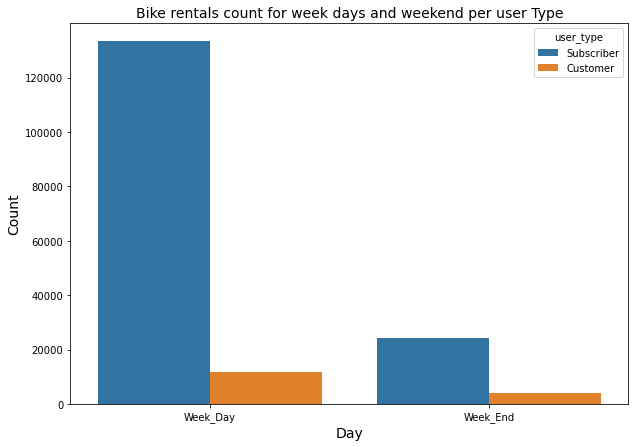

In [37]:
order_index= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,7));
sb.countplot(data = df, x = "isWeekend",  hue='user_type')
plt.title("Bike rentals count for week days and weekend per user Type",fontsize=14);
plt.ylabel("Count",fontsize=14)
plt.xlabel("Day",fontsize=14);

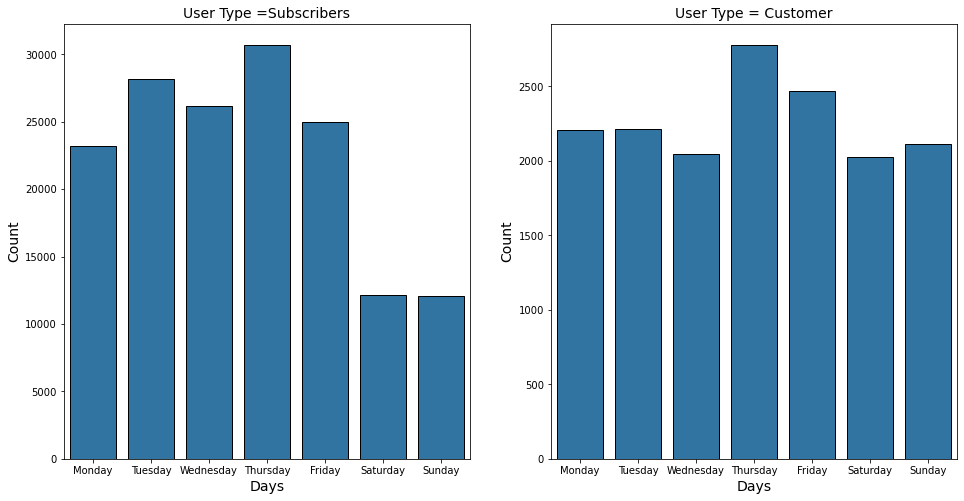

In [38]:
order_index= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day = pd.api.types.CategoricalDtype(ordered=True, categories=order_index)
df['day_name'] = df['day_name'].astype(day);

plt.figure(figsize=(16,8));
plt.subplot(1,2,1)
df_sub=df.query('user_type == "Subscriber"')
axe1= sb.countplot(data = df_sub, x = "day_name", color=base_color,edgecolor='black')
plt.title("User Type =Subscribers",fontsize=14);
plt.ylabel("Count",fontsize=14);
plt.xlabel("Days",fontsize=14);


plt.subplot(1,2,2)
df_cust=df.query('user_type == "Customer"')
sb.countplot(data = df_cust, x = "day_name", color=base_color ,edgecolor='black')
plt.title("User Type = Customer",fontsize=14);
plt.ylabel("Count",fontsize=14);
plt.xlabel("Days",fontsize=14);

#### we observe from this chart that for the subscribers the weekends has the lowest count with quite a large difference compared to normal week days and with the users type of customer is similar to the subscribers but the weekends dont have the lowest count and the difference between them and the week days is quite small in comparison with the difference noticed with the subscribers

#### 2. Now lets explore the relationship between user_type and duration

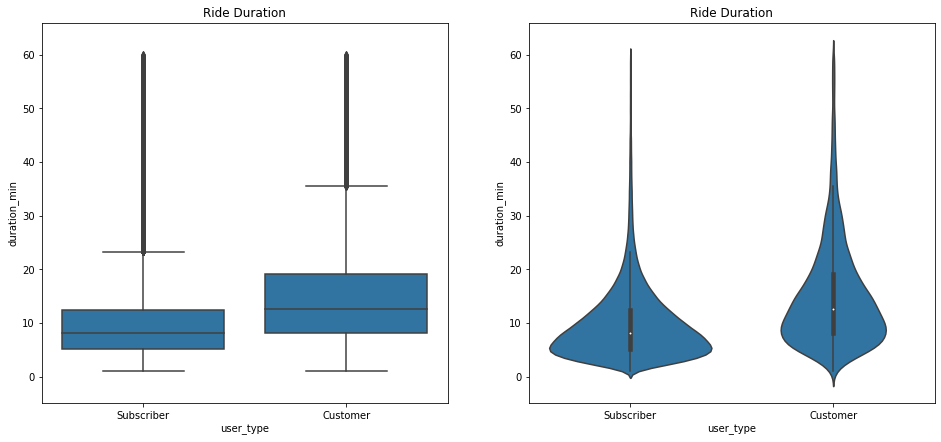

In [39]:
plt.figure(figsize = (16, 7))
plt.subplot(1, 2, 1)
axe1 = sb.boxplot(data = df, y = 'duration_min', x = 'user_type', color = base_color)
plt.title("Ride Duration");
plt.subplot(1, 2, 2, sharey=axe1)
sb.violinplot(data = df, y= 'duration_min', x = 'user_type', color = base_color)
plt.title("Ride Duration");


#### From perivous observations we know that the subscribers rent more than the customers but in this chart  where we observe the duration and user type we can clearly see that customers take longer rides than the subscribers 

#### 3. Now lets Compare gender and duration per min

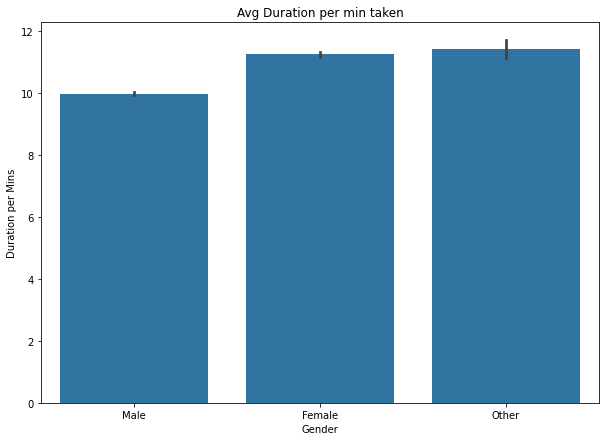

In [40]:
plt.figure(figsize = (10, 7))
sb.barplot(data=df, x='member_gender', y='duration_min',  color=base_color)
plt.ylabel('Duration per Mins');
plt.xlabel('Gender');
plt.title('Avg Duration per min taken');

#### we can observe that other take the highest duration then secondly female then male with the least avg duration we also should investigate this further by adding the age to our chart later in the Multivariant section

#### 4. Now lets Compare gender and age

member_gender
Female    35.155056
Male      36.370192
Other     37.793557
Name: age, dtype: float64

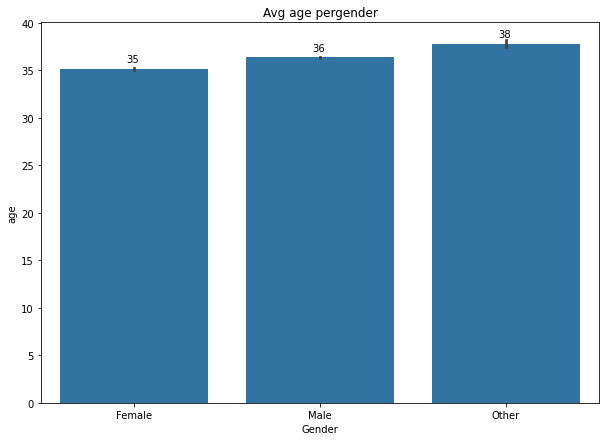

In [41]:
plt.figure(figsize = (10, 7))
sb.barplot(data=df, x='member_gender', y='age', order=['Female','Male','Other'] , color=base_color)
plt.ylabel('age');
plt.xlabel('Gender');
plt.title('Avg age pergender');
value_means=df.groupby('member_gender')['age'].mean()
for i in range (len(value_means)):
    count = value_means[i]
    pct_string =  '{:0.0f}'.format(count)
    plt.text(i-0.04, count+1, pct_string, va='center')

value_means

#### We can see that the avg age of male bikers is 35 and the avg female age is 36 while the others avg age is 38

#### 5. Now lets compare the rent hour and age

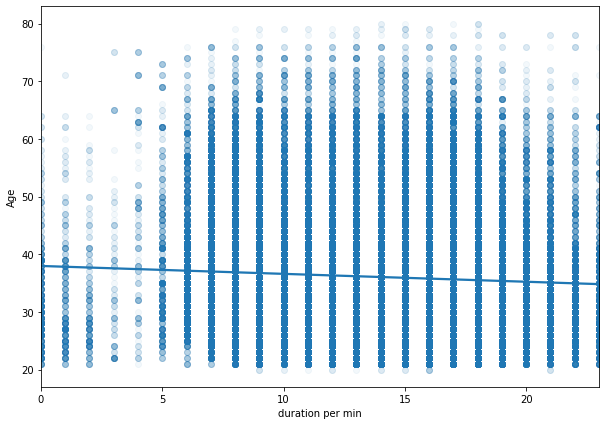

In [42]:
plt.figure(figsize = (10, 7))
sb.regplot(data = df, x = 'Start_hour', y = 'age',scatter_kws={'alpha':1/20});
plt.xlabel('duration per min')
plt.ylabel('Age');

#### we can see that the duration starts to increase very slightly as the age decrease which is as expected

#### 6. lets compare Start  and end stations top and lowest three terms of traffic

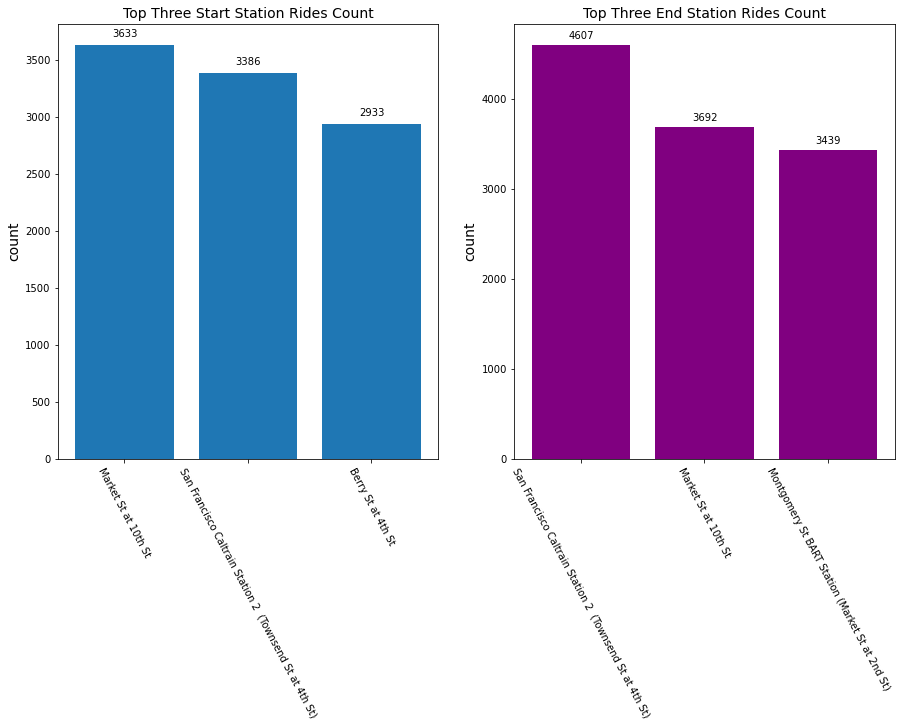

In [43]:
names ,values = top_companies('start_station_name',3)
plt.figure(figsize=(15,8));
plt.subplot(1, 2, 1)
plt.bar(x=names,height=values,align="center")
for i in range (len(names)):
    count = values[i]
    pct_string = '{}'.format(count)
    plt.text(i-0.1, count+100, pct_string, va='center')
plt.xticks(rotation=-62) ;
plt.title('Top Three Start Station Rides Count',fontsize=14);
plt.ylabel('count',fontsize=14);

names ,values = top_companies('end_station_name',3 )
plt.subplot(1, 2, 2)
plt.bar(x=names,height=values,align="center",color="purple")
for i in range (len(names)):
    count = values[i]
    pct_string = '{}'.format(count)
    plt.text(i-0.1, count+100, pct_string, va='center')
plt.xticks(rotation=-62) ;
plt.title('Top Three End Station Rides Count',fontsize=14);
plt.ylabel('count',fontsize=14);

 #### Here We can observe the top 3 Start and End  Staions in terms of ride count

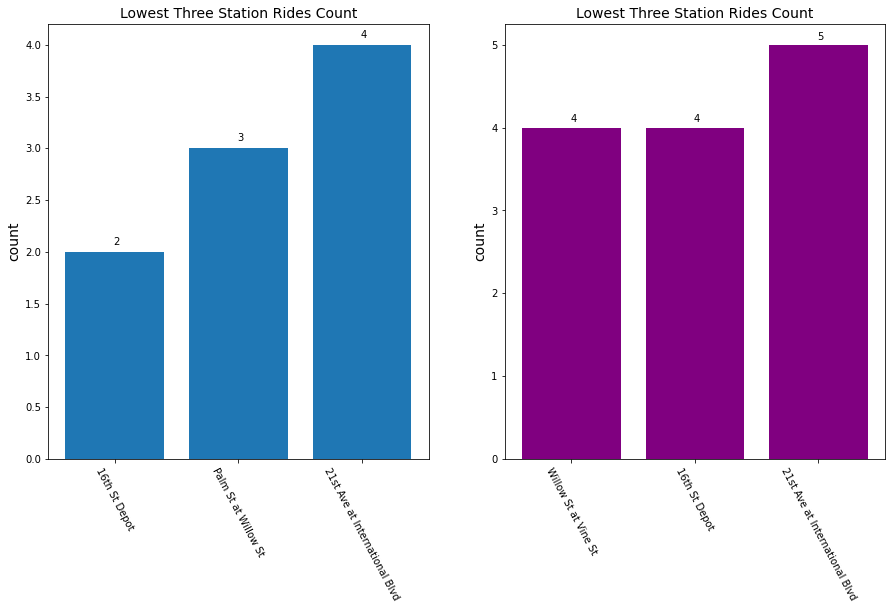

In [44]:
# the lowest three
names ,values = top_companies('start_station_name',3,True)
plt.figure(figsize=(15,8));
plt.subplot(1, 2, 1)
plt.bar(x=names,height=values,align="center")
for i in range (len(names)):
    count = values[i]
    pct_string = '{}'.format(count)
    plt.text(i-0.01, count+0.1, pct_string, va='center')
plt.xticks(rotation=-62) ;
plt.title('Lowest Three Station Rides Count',fontsize=14);
plt.ylabel('count',fontsize=14);

names ,values = top_companies('end_station_name',3 ,True)
plt.subplot(1, 2, 2)
plt.bar(x=names,height=values,align="center",color="purple")
for i in range (len(names)):
    count = values[i]
    pct_string = '{}'.format(count)
    plt.text(i-0.01, count+0.1, pct_string, va='center')
plt.xticks(rotation=-62) ;
plt.title('Lowest Three Station Rides Count',fontsize=14);
plt.ylabel('count',fontsize=14);

 #### Here We can observe the Lowest 3 Start and End  Staions in terms of ride count

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* We observed that for the subscribers the week days are the most active days with weekends as the lowest active days while the customers had a more normal distribution between the the entier week in terms of renatl count. which suggests that subscribers use the rental service to commute to thier jobs during the weekdays 

* We observed that the avg trip duration will be longer for customers than subscribers which is interesting as we know subscribers use the rental service more but it seems they only use it for short daily activites.

* We observed that other take the highest avg duration per min then secondly female then finally male with the least avg duration we also should investigate this further by adding the age to our chart later in the Multivariant section

* We observed that the avg age of male bikers is 35 and the avg female age is 36 while the others avg age is 38

* we observed that the duration per min starts to increase very slightly as the age decrease which is as expected

* We also observed Start and end stations top and lowest three in terms of traffic which will help to determine which station to take better care of or allocate more resource to for example


## Multivariate Exploration

#### 1.Lets compare duration between week days and weekends according to user type

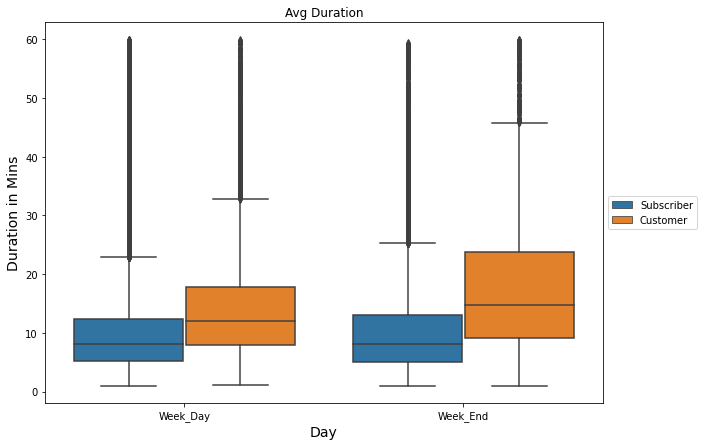

In [45]:
plt.figure(figsize = (10, 7))
sb.boxplot(data=df, x='isWeekend', y='duration_min', hue="user_type")
plt.ylabel('Duration in Mins' ,fontsize=14);
plt.xlabel("Day",fontsize=14);
plt.title('Avg Duration');
plt.legend(bbox_to_anchor = (1, 0.5), loc = 6);

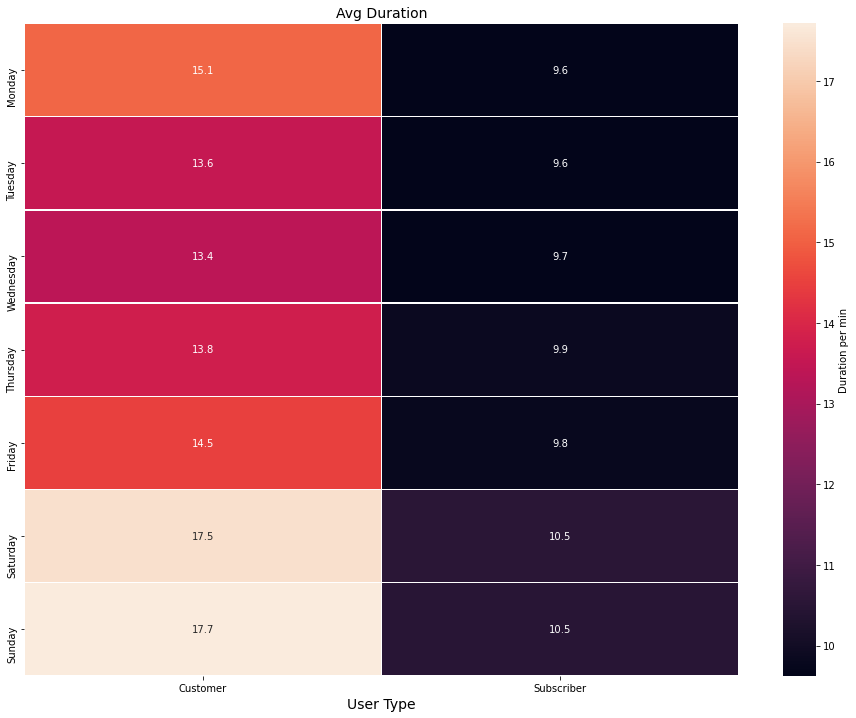

In [46]:
ct_counts = df.groupby(['day_name', 'user_type'])['duration_min'].mean()
ct_counts = ct_counts.reset_index(name='count')
plt.figure(figsize=(16,12))
ct_counts = ct_counts.pivot(index = 'day_name', columns = 'user_type', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = '.01f',linewidths=.3,cbar_kws = {'label' : 'Duration per min'});
plt.ylabel('' ,fontsize=14);
plt.xlabel("User Type",fontsize=14);
plt.title('Avg Duration',fontsize=14);

#### We can observe that the customers take longer Rides through the entier week than subscribers but the difference is especially clear between the weekends of the customer and subscribers where the highest difference is represented

#### 2.Lets compare avg Start_hour according to the day and user_type

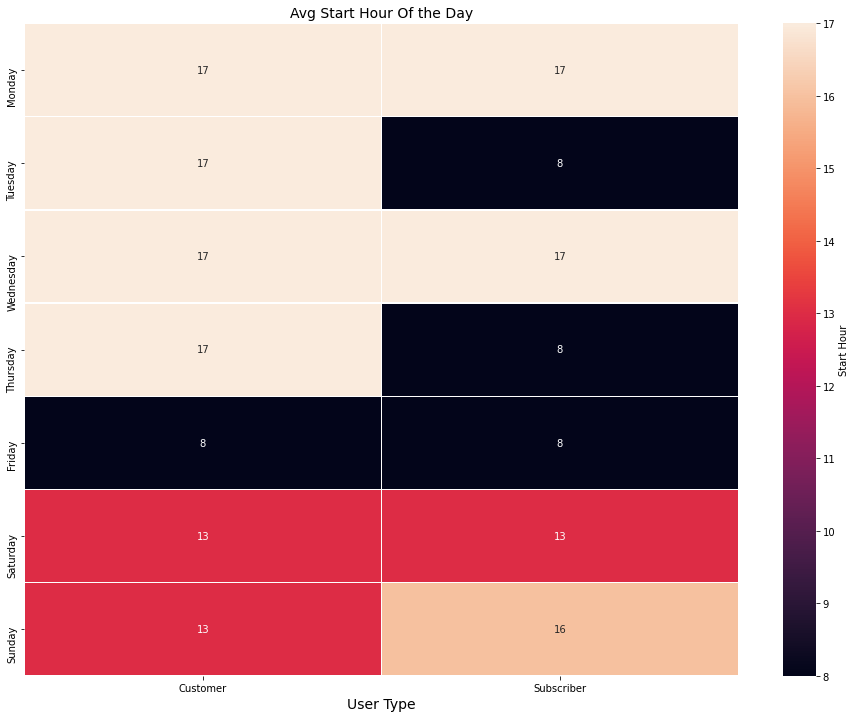

In [47]:
ct_counts = df.groupby(['day_name', 'user_type'])['Start_hour'].agg(pd.Series.mode)
ct_counts = ct_counts.reset_index(name='count')
plt.figure(figsize=(16,12))
ct_counts = ct_counts.pivot(index = 'day_name', columns = 'user_type', values = 'count')
sb.heatmap(ct_counts, annot = True,linewidths=.3,cbar_kws = {'label' : 'Start Hour'});
plt.ylabel('' ,fontsize=14);
plt.xlabel("User Type",fontsize=14);
plt.title('Avg Start Hour Of the Day',fontsize=14);

#### We notice that through the weeks days from monday to friday the busiest time for users who are customers would be around 5 pm while for the subscribers it would be around 8 am and at the weekend for the customer it would be around 1 pm. while for subscribers its evenly divided between 1pm at saturday and 4 pm at sunday

#### 3.Lets compare avg duration between according to user type and gender

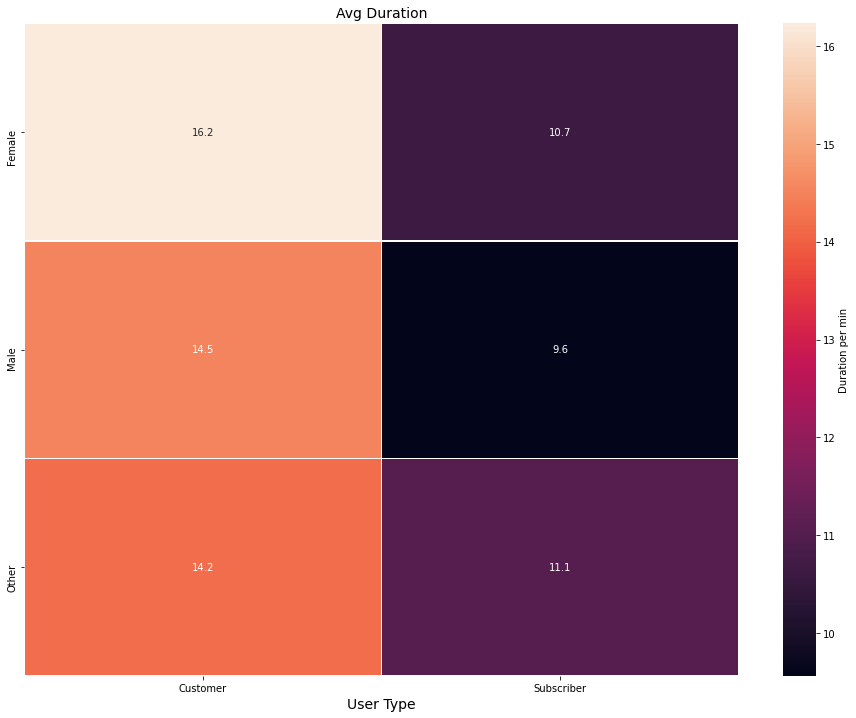

In [48]:
ct_counts = df.groupby(['member_gender', 'user_type'])['duration_min'].mean()
ct_counts = ct_counts.reset_index(name='count')
plt.figure(figsize=(16,12))
ct_counts = ct_counts.pivot(index = 'member_gender', columns = 'user_type', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = '.01f',linewidths=.3,cbar_kws = {'label' : 'Duration per min'});
plt.ylabel('' ,fontsize=14);
plt.xlabel("User Type",fontsize=14);
plt.title('Avg Duration',fontsize=14);

#### Here we can see that For the customers the gender type who enjoys the longest ride ar femals with record of 16 min avg while for the subscribers we find that others have the highest avg of 11 min

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* We observed that Subscribers have almost similar ride duration throught the week while the customers take longer Rides through the entier week but the difference is especially clear between the weekends of the customer and subscribers where the highest difference is represented and also the duration for the customer weekends is around 3 mins longer than the avg duration for the customer week days so I guess the customers like to enjoy longer rider on thier day off. 

* We observed that through the week days from monday to friday the busiest time for users who are customers would be around 5 pm while for the subscribers it would be around 8 am and at the weekend for the customer it would be around 1 pm. while for subscribers its evenly divided between 1pm at saturday and 4 pm at sunday. this supports our suggestion that users Mostly use the service for work during the week days and for leisurely activites during the weekend

* We observed that For the customers the gender type who enjoys the longest ride ar femals with record of 16 min avg while for the subscribers we find that others have the highest avg of 11 min

### Were there any interesting or surprising interactions between features?

> I didn't excpect the customers to have an average ride duration longer than the subscribers throught the whole week since the subscribers are the ones who use the rental services more